---
title: "Bifurcations"
format: html
---

## Introduction

The qualitative behaviour of solutions of
$$
\dot{x}=f(x), \quad  x(0)=x_0
$$

are limited. Solutions either *flow* to a fixed point, remain at a fixed point or tend to $\pm \infty$. So what is interesting about the study of such problems? 

Now we introduce the idea of bifurcations. These arise when the structure of the solutions (i.e. the number and/or stability of fixed points) changes at particular parameter values. 

At a bifurcation point of a 1D system the eigenvalue is 0. Hence the fixed point is *not* hyperbolic.


Consider the 1D system
$$
\dot{x}=f(x,r)
$$
where $r$ is a parameter.

Suppose that 

- there is a fixed point $x=x^*$.
- at some $r=r_c$ the eigenvalue of the linearised system vanishes.

Upon Taylor expansion of $f$ about $(x^*,r_c)$,
we obtain
$$
\dot{x}=f(x^*,r_c)+\frac{\partial f}{\partial x}_{(x^*,r_c)}(x-x^*) + \frac{\partial f}{\partial r}_{(x^*,r_c)}(r-r_c)
+ \frac{1}{2}(x-x_c)^2\frac{\partial^2 f}{\partial x^2}_{(x^*,r_c)}  + ... $$

As $x^*$ is a fixed point

$$
\dot{x}= \frac{\partial f}{\partial r}_{(x^*,r_c)}(r-r_c)
+ \frac{1}{2}(x-x^*)^2\frac{\partial^2 f}{\partial x^2}_{(x^*,r_c)}  +\frac{1}{2}(r-r_c)^2\frac{\partial^2 f}{\partial r^2}_{(x^*,r_c)} +(r-r_c)(x-x^*)\frac{\partial^2 f}{\partial r \partial x}_{(x^*,r_c)}  ... $$

Close to a bifurcation point, the stability classification will be determined by the higher order derivatives of $f$ w.r.t. $x$ and $r$.

It can be shown that bifurcations of the systems
$$
\dot{x}=f(x,r), \quad x(0)=x_0
$$
can be reduced to one of three *normal forms*:

- saddle node bifurcations
- transcritical bifurcations
- pitchfork  bifurcations

## Saddle node

At a saddle node bifurcation, two fixed points move towards one another and mutually annihilate. The canonical form is given by

$$
\dot{x}=f(x,r)=r+x^2,
$$ {#eq-saddlenode1d}
where $r \in \Re$.


::: {#exm-    }

Identify  the fixed points of @eq-saddlenode1d and determine their linear stability.
:::

::: {.Solution}

The fixed points are 
$$
 x^*_{\pm}=\pm \sqrt{-r}.
$$

In the case $r<0$

$$
 f'(x^*)=\pm 2\sqrt{-r}.
$$

Hence $x^*_-$ is linearly stable and $x^*_+$ is linearly unstable.

For $r=0$ the fixed point is *half-stable* and it vanishes for $r>0$. Upon plotting $x^*$ against $r$ we obtain a bifurcation diagram.
:::

In @fig-fsaddlenode we plot $f$ at three different values of $r$. Note that when $r>0$, $f>0$ and the solution is an increasing function of time.

At $r=0$ there is a double root of $f$. Here the fixed point is *half stable*. For the initial condition $x_0<0$ the solution will increase until $x(t=0)$. It is stable to perturbations along the negative $x$ axis. However, for $x_0>0$ $f>0$ and the solution is an increasing function of time. Hence the solution is unstable to perturbations with $x_0>0$. Hence the fixed point $x^*=0$ is defined to be half-stable when $r=0$.


::: {#fig-fsaddlenode}

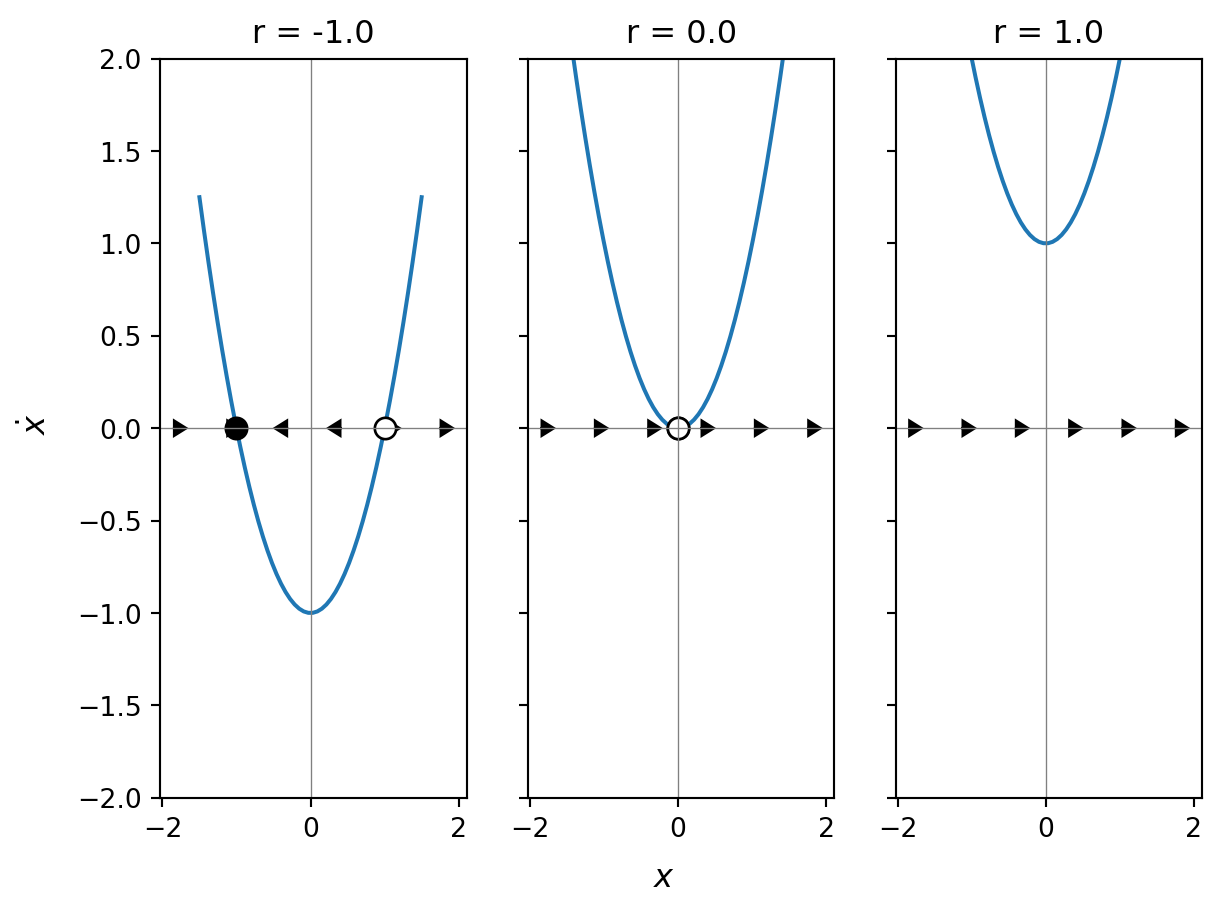

In [1]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-1.5,1.5)

r_vec=[-1.0,0.0,1.0]
fig,ax=plt.subplots(1,3,sharex=True, sharey=True)
ax=ax.flatten()

for i,r_i in enumerate(r_vec):
    f=r_i+x**2
    ax[i].plot(x,f)
    r=r_i
     # ---- fixed points ----
    fixed_points = []
    if r <= 0:
        fixed_points += [np.sqrt(-r), -np.sqrt(-r)]
    
    for x_fp in fixed_points:
        df =  2 * x_fp   # derivative at fixed point
        
        if df < 0:   # stable
            ax[i].plot(x_fp, 0, 'ko', markersize=8)
        else:        # unstable
            ax[i].plot(x_fp, 0, 'ko', markerfacecolor='white', markersize=8)

    ax[i].axhline(0, color='gray', lw=0.5)
    ax[i].axvline(0, color='gray', lw=0.5)
    ax[i].set_title(f"r = {r}")
    ax[i].set_ylim([-2,2])

    x_arrows = np.linspace(-1.8, 1.8, 6)
    f_arrows = r+x_arrows**2

    for xa, fa in zip(x_arrows, f_arrows):
        if abs(fa) < 1e-6:
            continue
        direction = np.sign(fa)
        ax[i].arrow(
            xa, 0,
            0.12 * direction, 0,
            head_width=0.08,
            head_length=0.16,
            fc='k', ec='k',
            length_includes_head=True
        )
    fig.supxlabel('$x$')
    fig.supylabel('$\dot{x}$')

:::


In @fig-saddlenodebfc we plot the fixed points against the parameter $r$. For $r<0$ there are two fixed points ($\sqrt{r}$ is linearly unstable whilst $-\sqrt{r}$ is linearly stable). Usually some annotation is used to denote the stability. For $r>0$ there are no fixed points. 

:::{#fig-saddlenodebfc}

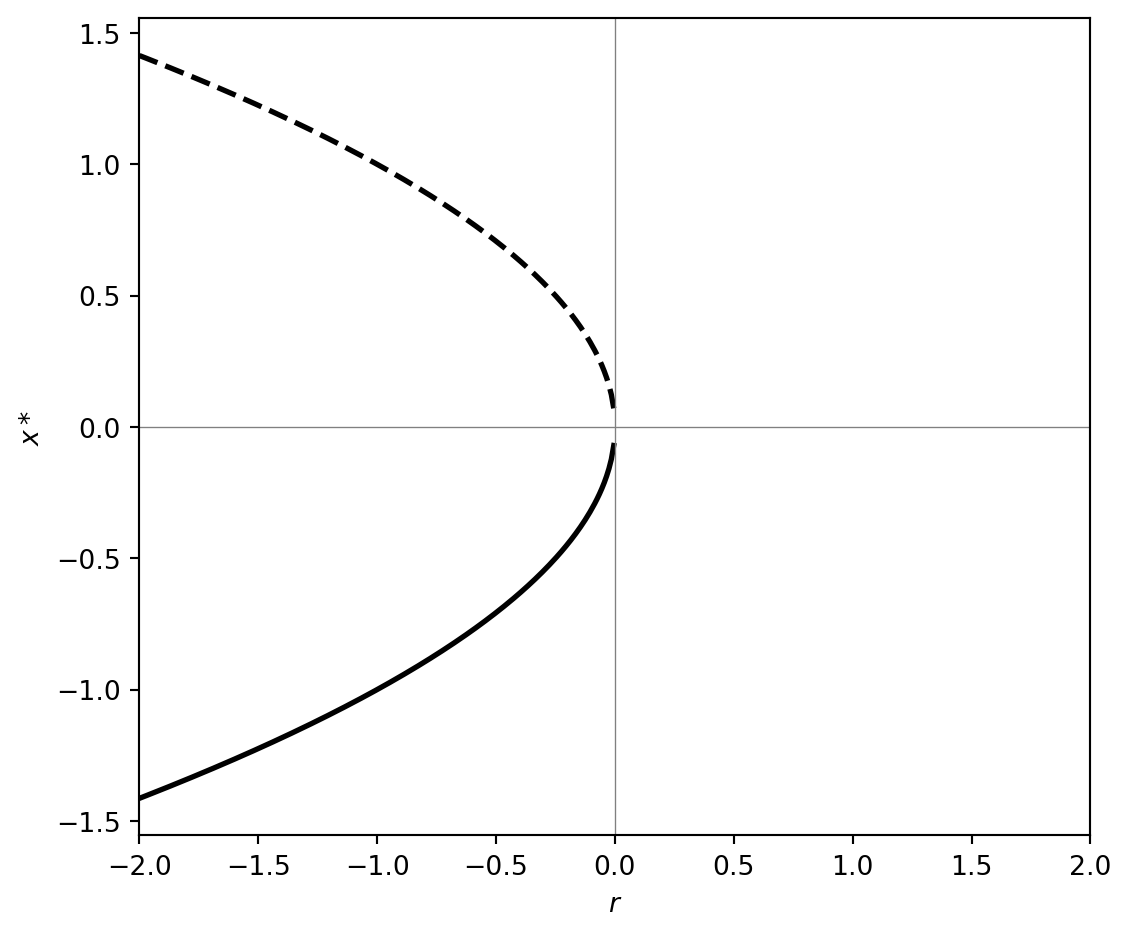

In [2]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(-2, 2, 400)

# fixed points
x0 = np.zeros_like(r)

x_plus = np.full_like(r, np.nan)
x_minus = np.full_like(r, np.nan)

mask = r > 0
x_plus[mask] = np.sqrt(r[mask])
x_minus[mask] = -np.sqrt(r[mask])

fig, ax = plt.subplots(figsize=(6, 5))

# unstable branch x = 0 for r > 0


# stable branches ±sqrt(r)
ax.plot(-r, x_plus, 'k--', lw=2)
ax.plot(-r, x_minus, 'k-', lw=2)

ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

ax.set_xlabel("$r$")
ax.set_ylabel("$x*$")
ax.set_xlim([-2,2])


plt.tight_layout()
plt.show()


:::

::: {.content-visible when-format="html"}

With the app below you can explore how the value of the parameter value $r$ affects system dynamics. 

The app computes solutions to 
$$
\dot{x}=r+x^2, \quad x(0)=x_0, \quad t \in[0,T].
$$

```{shinylive-python}
#| standalone: true
#| viewerHeight: 800
#| label: fig-saddlenode


from shiny import App, Inputs, Outputs, Session, render, ui
from shiny import reactive

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.integrate import odeint

app_ui = ui.page_fluid(
                 
    ui.input_slider(id="u0",label="x_0 (Init. Cond.)",min=-1.0,max=1.0,value=0.5,step=0.01),
    ui.input_slider(id="T",label="T (Time)",min=0.1,max=60.0,value=20.0,step=1.0),
    ui.input_slider(id="r",label="r",min=-1.0,max=1.0,value=0.1,step=0.01),
    ui.output_plot("plot"),

)

def server(input, output, session):
    @output
    @render.plot
    def plot():
        fig, ax = plt.subplots(3,1,figsize=(12, 4))
        #ax.set_ylim([-2, 2])
        #         
        r=float(input.r())
        u0=float(input.u0())
        T=int(input.T())

        if r>0:
            T=1/np.sqrt(r)*(np.pi/2.0-np.arctan(u0/np.sqrt(r)))
        elif (r<0):
            if u0>np.sqrt(-r):
                T=1/np.sqrt(-r)*(np.pi/2.0-np.arctan(u0/np.sqrt(-r)))
        else:
            T=1/u0
        

        # Define rhs of bfc ODE 
        def saddle_node_bfc_rhs(y,t,r):
          rhs=r+y**2.0
          return rhs
        
        def ODESol(saddle_node_bfc_rhs,y_0,t,r):
            y=np.zeros_like(t,dtype=float)
            init_cond=y_0

            
            sol1 = odeint(saddle_node_bfc_rhs, init_cond,t,args=(r,))
            return sol1
            
        # Define discretised t domain
        t = np.linspace(0, T)
        # define initial conditions
        init_cond=u0
        
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x(t)$')

        plt.grid()
        
        # Compute numerical solution of ODEs
        sol1 = ODESol(saddle_node_bfc_rhs,init_cond,t,r)

        # Plot results
        x=sol1
        
        ax[0].plot(t,x)
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x$')
        ax[0].set_ylim([-3,3])
        ax[0].set_title('Numerical solution')

        r_values = np.linspace(-2.0, 2.0, 1000)  # range of r values
        
        x=np.sqrt(r_values)

        ax[1].plot(-r_values,x,'k--',-r_values,-x,'k')
        ax[1].set_xlabel('$r$')
        ax[1].set_ylabel('$x^*$')
        ax[1].set_xlim([-3,3])
        ax[1].set_title('Bifurcation diagram')
        ax[1].plot([r,r],[-3,3],'--')


        x_plot=np.linspace(-3,3)
        f=saddle_node_bfc_rhs(x_plot,0,r)
        ax[2].plot(x_plot,f)
        ax[2].set_xlabel('$x$')
        ax[2].set_ylabel('$f$')
        ax[2].set_ylim([-2,2])
        ax[2].plot([u0,u0],[-2,2],'--')

        ax[2].set_title('Phase portrait')
        


        
app = App(app_ui, server)
```

An app to exploring behaviour of the saddle-node bifurcation.
:::







::: {#exm-    }
Consider the following ODE:
$$
\dot{x}=1+rx+x^2, \quad x(0)=x_0.
$$

1. Sketch the bifurcation diagram.
2. Show that upon introducing rescaled variables, the ODE can be written in the normal form
$$
\dot{y}=r'+y^2.
$$
Hint: try completing the square.

:::

<!--Note that a saddle-node bifurcation is defined by a tangency condition such that 
$$
\frac{\partial f}{\partial x}_{(x^*,r_c)}.
$$

Hence the normal form is 
$$
\dot{x}= \frac{\partial f}{\partial r}_{(x^*,r_c)}(r-r_c)
+ \frac{1}{2}(x-x_c)^2\frac{\partial^2 f}{\partial x^2}_{(x^*,r_c)} 
$$
i.e. the right-hand side is linear in $r$ and quadratic in $x$.
-->


## Transcritical

At a transcritical bifurcation the stability of a fixed point changes as a parameter is varied. However, fixed points do not 
*disappear*, as was the case with the saddle node bifurcation.


The *normal form* for a transcritical bifurcation is

$$
\dot{x}=rx-x^2,
$$

::: {#exm-    }

Identify the fixed points and their linear stability

:::


::: {.Solution}
The fixed points are $x^*=0$ and $x^*=r$. For $r<0$, $x^*=r$ is linearly unstable and $x^*=0$ is linearly stable. At $r=0$ the fixed points coalesce and the fixed point is half stable. For $r>0$ $x^*=0$ is linearly unstable and $x^*=r$ is linearly stable.

:::

In @fig-transcritf the function $f$ is plotted for different values of the parameter $r$. The origin is always a fixed point. For $r<0$ there is a fixed point on the negative real axis whilst for $r>0$ there is a fixed point on the positive real axis. Hence the number of fixed points is two for $|r|>0$. This bifurcation is fundamentally different to the saddle node bifurcation (where there are no fixed points on one side of the bifurcation).


::: {#fig-transcritf}

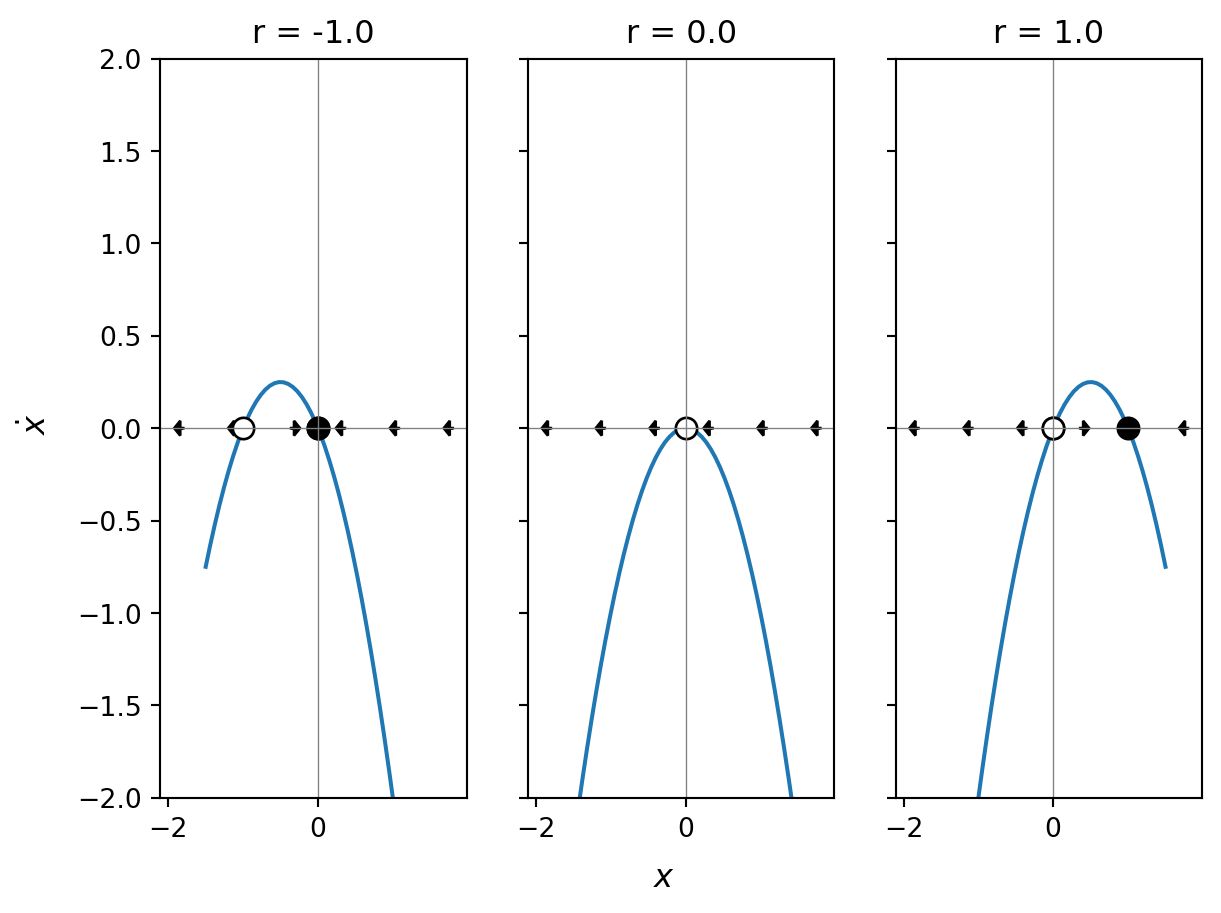

In [3]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-1.5,1.5)

r_vec=[-1.0,0.0,1.0]
fig,ax=plt.subplots(1,3,sharex=True, sharey=True)
ax=ax.flatten()

for i,r_i in enumerate(r_vec):
    f=r_i*x-x**2
    ax[i].plot(x,f)
    r=r_i
     # ---- fixed points ----
    fixed_points = [0.0]
    if r > 0:
        fixed_points += [0,r]
    elif r<0:
        fixed_points += [r,0]

    
    for x_fp in fixed_points:
        df = r - 2 * x_fp   # derivative at fixed point
        
        if df < 0:   # stable
            ax[i].plot(x_fp, 0, 'ko', markersize=8)
        else:        # unstable
            ax[i].plot(x_fp, 0, 'ko', markerfacecolor='white', markersize=8)

    ax[i].axhline(0, color='gray', lw=0.5)
    ax[i].axvline(0, color='gray', lw=0.5)
    ax[i].set_title(f"r = {r}")
    ax[i].set_ylim([-2,2])

    x_arrows = np.linspace(-1.8, 1.8, 6)
    f_arrows = r * x_arrows - x_arrows**2

    for xa, fa in zip(x_arrows, f_arrows):
        if abs(fa) < 1e-3:
            continue
        direction = np.sign(fa)
        ax[i].arrow(
            xa, 0,
            0.12 * direction, 0,
            head_width=0.08,
            head_length=0.08,
            fc='k', ec='k',
            length_includes_head=True
        )
    fig.supxlabel('$x$')
    fig.supylabel('$\dot{x}$')

:::



In @fig-transcritbfc we plot a bifurcation diagram for the transcritical bifurcation. Note that $x^*=0$ is always a fixed points but it's stability changes at $r=0$.

::: {#fig-transcritbfc}

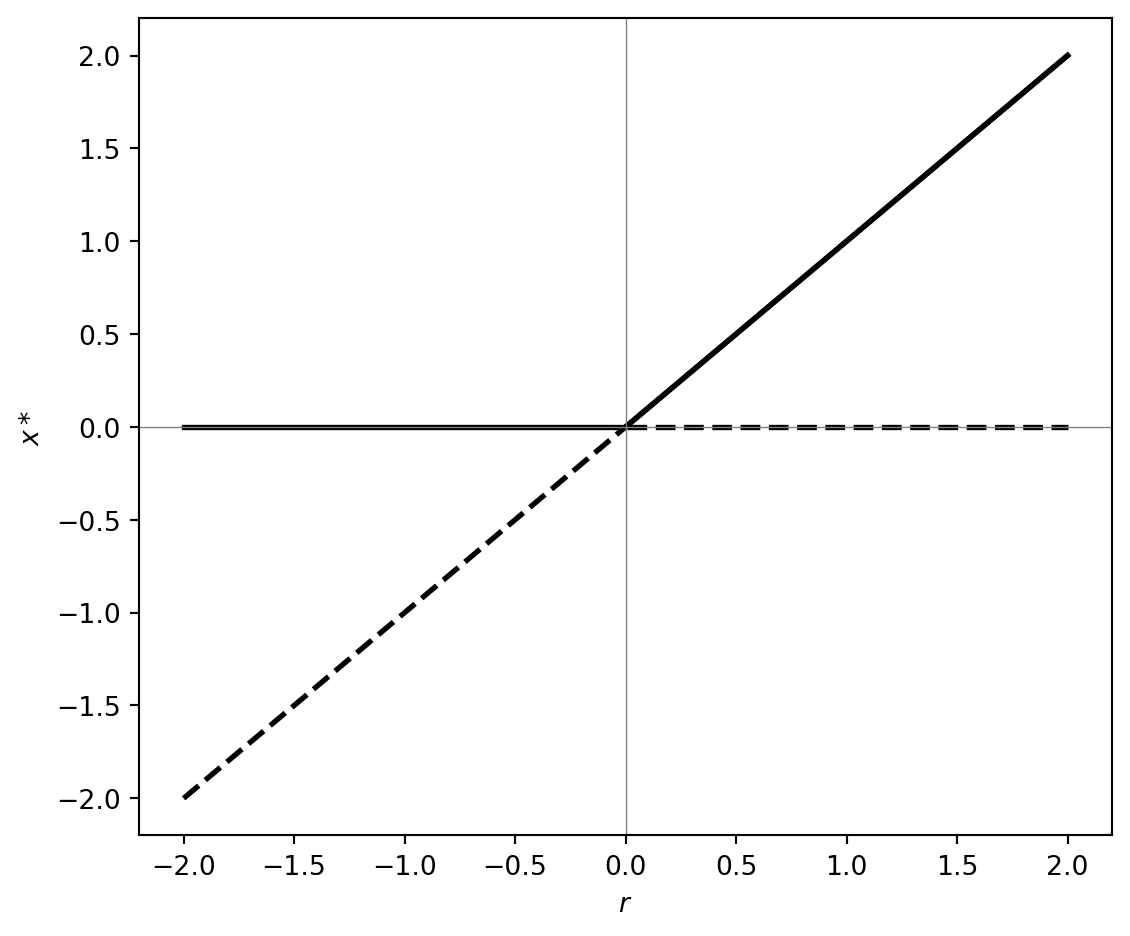

In [4]:
#| code-fold: true


import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(-2, 2, 400)

# fixed points
x0 = np.zeros_like(r)

x_plus = np.full_like(r, np.nan)
x_minus = np.full_like(r, np.nan)

mask = r >= 0
x_plus[mask] = (r[mask])
x_minus[mask] = (r[mask])

fig, ax = plt.subplots(figsize=(6, 5))

# unstable branch x = 0 for r > 0
ax.plot(r[r > 0], x0[r > 0], 'k--', lw=2)
ax.plot(r[r < 0], r[r < 0], 'k--', lw=2)

# stable branch x = 0 for r < 0
ax.plot(r[r < 0], x0[r < 0], 'k-', lw=2)

# stable branches ±sqrt(r)
ax.plot(r, x_plus, 'k-', lw=2)
ax.plot(r, x_minus, 'k-', lw=2)

ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

ax.set_xlabel("$r$")
ax.set_ylabel("$x*$")


plt.tight_layout()
plt.show()


:::


::: {.content-visible when-format="html"}

With the app below you can explore how the value of the parameter value $r$ affects system dynamics for the transcritical bifurcation. 

The app computes solutions to 
$$
\dot{x}=rx-x^2, \quad x(0)=x_0, \quad t \in[0,T].
$$

```{shinylive-python}
#| standalone: true
#| viewerHeight: 800
#| label: fig-transcrit


from shiny import App, Inputs, Outputs, Session, render, ui
from shiny import reactive

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

app_ui = ui.page_fluid(
                 
    ui.input_slider(id="u0",label="x_0 (Init. Cond.)",min=-3.0,max=3.0,value=0.5,step=0.01),
    ui.input_slider(id="T",label="T (Time)",min=0.1,max=60.0,value=20.0,step=1.0),
    ui.input_slider(id="r",label="r",min=-2.0,max=2.0,value=0.1,step=0.1),
    ui.output_plot("plot"),

)

def server(input, output, session):
    @output
    @render.plot
    def plot():
        fig, ax = plt.subplots(3,1,figsize=(12, 4))
        #ax.set_ylim([-2, 2])
        #         
        r=float(input.r())
        u0=float(input.u0())
        T=int(input.T())
    
        
        # Define rhs of bfc ODE 
        def saddle_node_bfc_rhs(t,y,r):
          rhs=r*y-y**2
          return rhs
        def stop_event(t, y,r):
            return np.abs(y[0]-10)          # trigger when y[0] == 0

        
        def ODESol(saddle_node_bfc_rhs,y_0,T,r):
            #y=np.zeros_like(t,dtype=float)
            init_cond=y_0

            stop_event.terminal = True   # STOP integration
            stop_event.direction = 1   # only trigger when crossing downward

            sol1 = solve_ivp(saddle_node_bfc_rhs,t_span=(0, T),y0=[init_cond],
                events=stop_event,args=(r,)
            )
            return sol1
            
        # Define discretised t domain
        # define initial conditions
        init_cond=u0
        
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x(t)$')

        plt.grid()
        
        # Compute numerical solution of ODEs
        sol1 = ODESol(saddle_node_bfc_rhs,init_cond,T,r)
        
        ax[0].plot(sol1.t,sol1.y[0])
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x$')
        ax[0].set_ylim([-10,10])
        ax[0].set_title('Numerical solution')

        
        r_values = np.linspace(-2.0, 2.0, 1000)  # range of r values
        
        x_1=np.zeros_like(r_values)
        x_2=r_values

        ax[1].plot(r_values[r_values<0],x_1[r_values<0],'k',r_values[r_values<0],x_2[r_values<0],'k--')
        ax[1].plot(r_values[r_values>0],x_1[r_values>0],'k--',r_values[r_values>0],x_2[r_values>0],'k')
        ax[1].set_xlabel('$r$')
        ax[1].set_ylabel('$x^*$')
        ax[1].set_xlim([-3,3])
        ax[1].set_title('Bifurcation diagram')
        ax[1].plot([r,r],[-3,3],'--')

        
        x_plot=np.linspace(-3,3)
        f=saddle_node_bfc_rhs(0,x_plot,r)
        ax[2].plot(x_plot,f)
        ax[2].set_xlabel('$x$')
        ax[2].set_ylabel('$f$')
        ax[2].set_ylim([-2,2])
        ax[2].plot([u0,u0],[-2,2],'--')

        ax[2].set_title('Phase portrait')

        x_arrows = np.linspace(-1.8, 1.8, 6)
        f_arrows = r * x_arrows - x_arrows**2

        for xa, fa in zip(x_arrows, f_arrows):
            if abs(fa) < 1e-3:
                continue
            direction = np.sign(fa)
            ax[2].arrow(
                xa, 0,
                0.12 * direction, 0,
                head_width=0.2,
                head_length=0.28,
                fc='k', ec='k',
                length_includes_head=True
            )
        
                
app = App(app_ui, server)
```

An app for exploring behaviour of the transcritical bifurcation.
:::


<!--
For a transcritical bifurcation

$$
\frac{\partial f}{\partial x}_{(x^*,r_c)}=0, \quad  \frac{\partial f}{\partial r}_{(x^*,r_c)}=0
$$

and the leading order terms are given by

$$
\dot{x}= 
\frac{1}{2}(x-x^*)^2\frac{\partial^2 f}{\partial x^2}_{(x^*,r_c)} +(r-r_c)(x-x^*)\frac{\partial^2 f}{\partial r \partial x}_{(x^*,r_c)} 
$$
-->

::: {#exm-    }

Sketch the bifurcation diagram for

$$
\dot{x}=rx+x^2.
$$


:::

::: {#exm-    }

Consider the ODE

$$
\dot{x}=r\ln x + x-1.
$$

1. Show that $x^*=1$ is a fixed point. 
2. Make a change of variables $u=x-1$ in order to analyse perturbations about the fixed point.
3. Use a Taylor expansion to show that this system can be approximated by the transcritical normal form. Hence deduce that the bifurcation vaue is $r=-1$.
4. Show that the system can be reduced to the normal form
$$
\dot{X}=RX-X^2
$$
by making an appropriate change of variables.


:::


 


## Pitchfork

Pitchfork bifurcations often arise in situations with symmetry. Typically, two or more fixed points appear/disappear together.

### Supercritical pitchfork


The normal form of the supercritical pitchfork bifurcation is
$$
\dot{x}=rx-x^3,
$$


::: {#exm-    }

Identify the fixed points and determine their linear stability

:::



::: {.Solution}
The fixed points satisfy
$$
rx^*-{x^*}^3=0
$$

Hence $x^*$ is a fixed point. Other fixed points satisfy
$$
r-{x^*}^2=0
$$

Hence there is a pair of fixed points given by
$$
x^*= \pm \sqrt{r},
$$
defined for $r>0$.

For 
$$
f(x,r)=rx-x^3
$$
differentiation yields
$$
f'(x)=r-3x^2.
$$

At $x^*=0$

$$
f'(0)=r.
$$

For $r<0$, $x^*=0$ is linearly stable. For $r>0$, $x^*=0$ is linearly unstable.  There is a bifurcation at $r=0$.

At $x^*= \pm \sqrt{r}$ 

$$
f'(\pm \sqrt{r})=r-3r=-2r.
$$

Hence when real, non-trivial fixed points exist $r>0$ they are linearly stable.

At $r=0$ the fixed points coalesce and the fixed point is half stable. 

:::



In @fig-supcritf we plot $f$ for three different values of $r$. For $r<0$ it is clear that $x^*=0$ is a uniquye fixed point and that it is linearly stable. For $r>0$ $f$ is a cubic with three real roots. Note that the non-zero roots are linearly stable and symmetrically distributed about the origin. We refer to a system with two linearly stable fixd points as being *bistable*.



::: {#fig-supcritf}

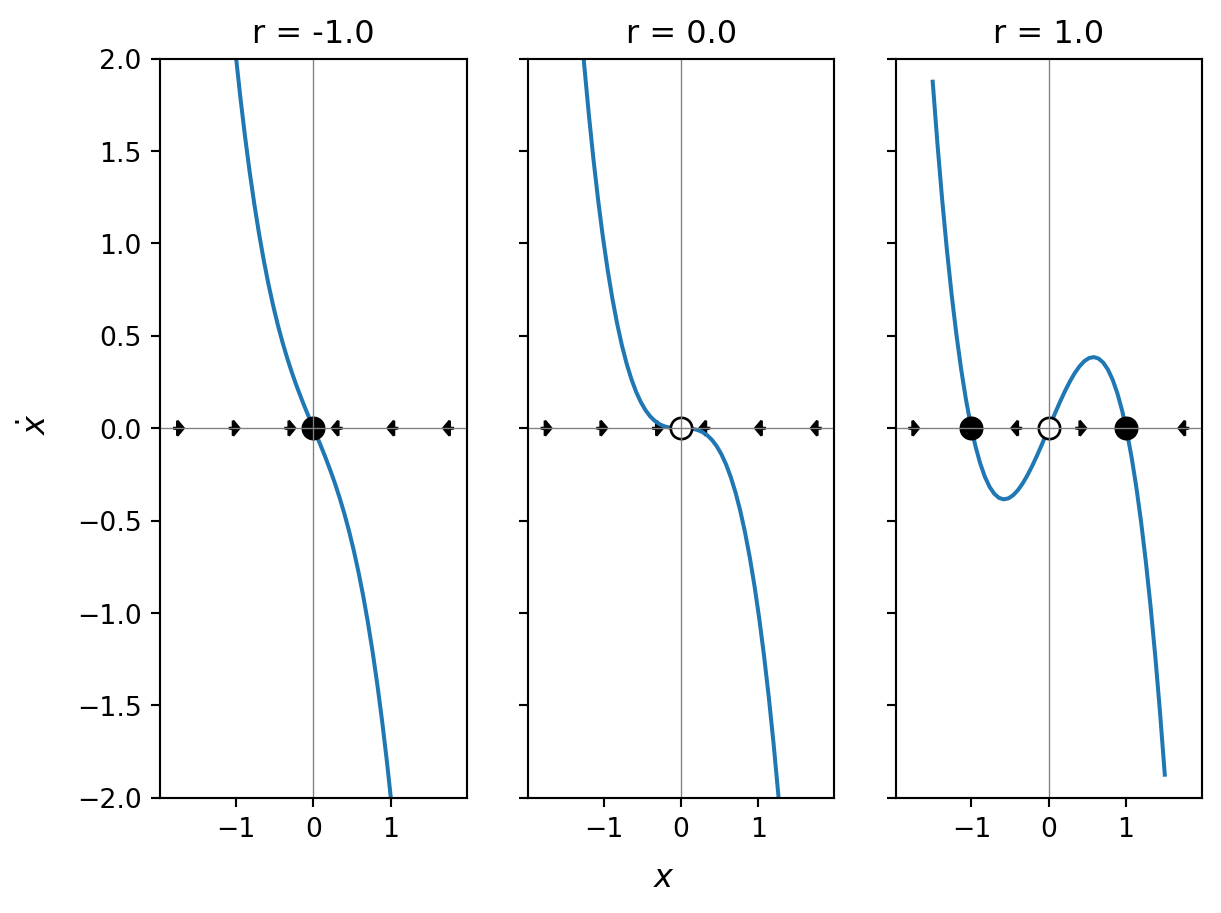

In [5]:
#| code-fold: true


import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-1.5,1.5)

r_vec=[-1.0,0.0,1.0]
fig,ax=plt.subplots(1,3,sharex=True, sharey=True)
ax=ax.flatten()

for i,r_i in enumerate(r_vec):
    f=r_i*x-x**3
    ax[i].plot(x,f)
    r=r_i
     # ---- fixed points ----
    fixed_points = [0.0]
    if r > 0:
        fixed_points += [np.sqrt(r), -np.sqrt(r)]
    
    for x_fp in fixed_points:
        df = r - 3 * x_fp**2   # derivative at fixed point
        
        if df < 0:   # stable
            ax[i].plot(x_fp, 0, 'ko', markersize=8)
        else:        # unstable
            ax[i].plot(x_fp, 0, 'ko', markerfacecolor='white', markersize=8)

    ax[i].axhline(0, color='gray', lw=0.5)
    ax[i].axvline(0, color='gray', lw=0.5)
    ax[i].set_title(f"r = {r}")
    ax[i].set_ylim([-2,2])

    x_arrows = np.linspace(-1.8, 1.8, 6)
    f_arrows = r * x_arrows - x_arrows**3

    for xa, fa in zip(x_arrows, f_arrows):
        if abs(fa) < 1e-3:
            continue
        direction = np.sign(fa)
        ax[i].arrow(
            xa, 0,
            0.12 * direction, 0,
            head_width=0.08,
            head_length=0.08,
            fc='k', ec='k',
            length_includes_head=True
        )
    fig.supxlabel('$x$')
    fig.supylabel('$\dot{x}$')

:::


In @fig-supcritbfc we plot a bifurcation diagram for the supercritical pitchfork. Note that when $r<0$ there is a single fixed point that is linearly stable. For $r>0$ there are three fixed points.

::: {#fig-supcritbfc}

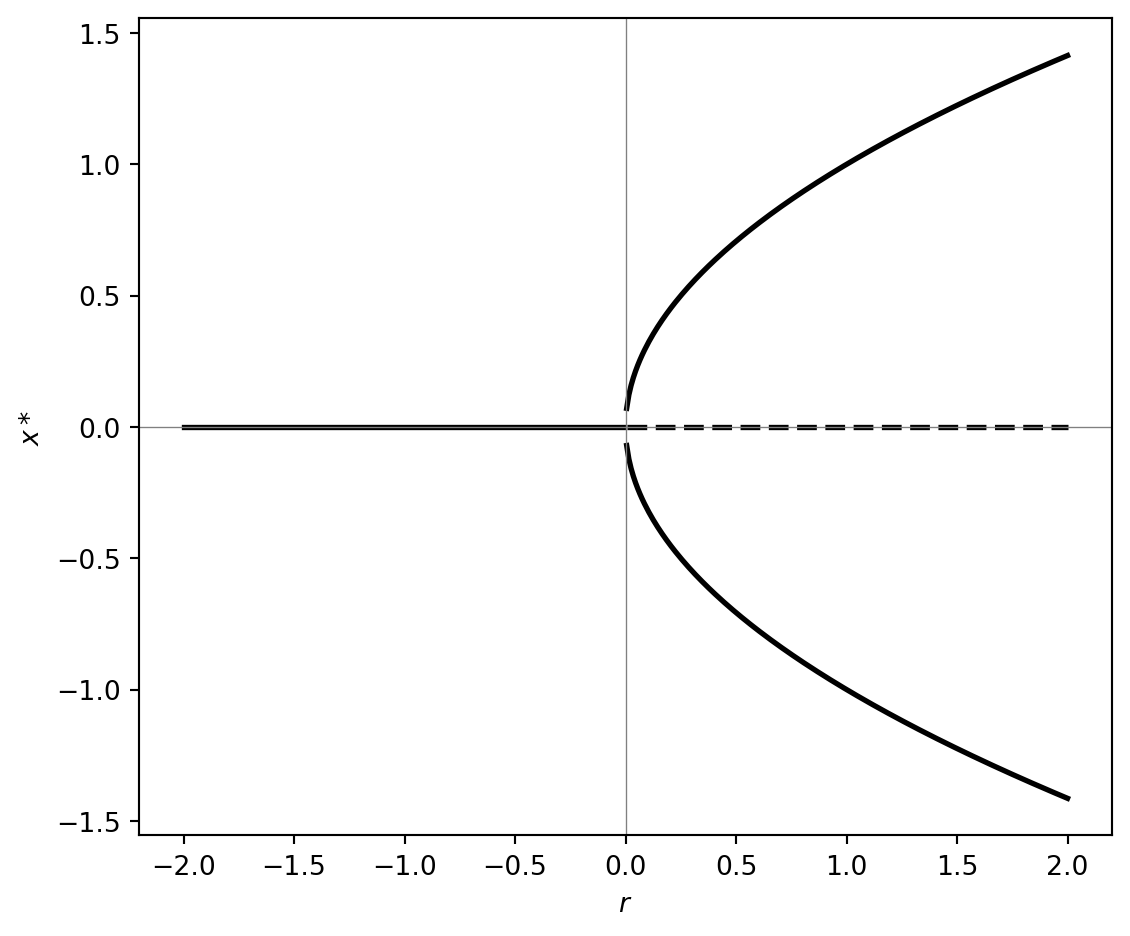

In [6]:
#| code-fold: true


import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(-2, 2, 400)

# fixed points
x0 = np.zeros_like(r)

x_plus = np.full_like(r, np.nan)
x_minus = np.full_like(r, np.nan)

mask = r >= 0
x_plus[mask] = np.sqrt(r[mask])
x_minus[mask] = -np.sqrt(r[mask])

fig, ax = plt.subplots(figsize=(6, 5))

# unstable branch x = 0 for r > 0
ax.plot(r[r > 0], x0[r > 0], 'k--', lw=2)

# stable branch x = 0 for r < 0
ax.plot(r[r < 0], x0[r < 0], 'k-', lw=2)

# stable branches ±sqrt(r)
ax.plot(r, x_plus, 'k-', lw=2)
ax.plot(r, x_minus, 'k-', lw=2)

ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

ax.set_xlabel("$r$")
ax.set_ylabel("$x*$")


plt.tight_layout()
plt.show()


:::


::: {.content-visible when-format="html"}

With the app below you can explore how the value of the parameter value $r$ affects system dynamics for the supercritical pitchfork bifurcation. 

The app computes solutions to 
$$
\dot{x}=rx-x^3, \quad x(0)=x_0, \quad t \in[0,T].
$$

1. Show that in the case where $r>0$ the initial conditions control which of the stable fixed points the system finds. 

```{shinylive-python}
#| standalone: true
#| viewerHeight: 800
#| label: fig-transcrit


from shiny import App, Inputs, Outputs, Session, render, ui
from shiny import reactive

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

app_ui = ui.page_fluid(
                 
    ui.input_slider(id="u0",label="x_0 (Init. Cond.)",min=-3.0,max=3.0,value=0.5,step=0.01),
    ui.input_slider(id="T",label="T (Time)",min=0.1,max=60.0,value=20.0,step=1.0),
    ui.input_slider(id="r",label="r",min=-2.0,max=2.0,value=0.1,step=0.1),
    ui.output_plot("plot"),

)

def server(input, output, session):
    @output
    @render.plot
    def plot():
        fig, ax = plt.subplots(3,1,figsize=(12, 4))
        #ax.set_ylim([-2, 2])
        #         
        r=float(input.r())
        u0=float(input.u0())
        T=int(input.T())
    
        
        # Define rhs of bfc ODE 
        def super_pitchfork_bfc_rhs(t,y,r):
          rhs=r*y-y**3
          return rhs
        def stop_event(t, y,r):
            return np.abs(y[0]-10)          # trigger when y[0] == 0

        
        def ODESol(rhs,y_0,T,r):
            #y=np.zeros_like(t,dtype=float)
            init_cond=y_0

            stop_event.terminal = True   # STOP integration
            stop_event.direction = 1   # only trigger when crossing downward

            sol1 = solve_ivp(rhs,t_span=(0, T),y0=[init_cond],
                events=stop_event,args=(r,)
            )
            return sol1
            
        # Define discretised t domain
        # define initial conditions
        init_cond=u0
        
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x(t)$')

        plt.grid()
        
        # Compute numerical solution of ODEs
        sol1 = ODESol(super_pitchfork_bfc_rhs,init_cond,T,r)
        
        ax[0].plot(sol1.t,sol1.y[0])
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x$')
        ax[0].set_ylim([-2.5,2.5])
        ax[0].set_title('Numerical solution')

        
        r_values = np.linspace(-2.0, 2.0, 1000)  # range of r values
        r_values2 = np.linspace(0.0, 2.0, 1000)  # range of r values

        
        x_1=np.zeros_like(r_values)
        x_2=np.sqrt(r_values2)

        ax[1].plot(r_values,x_1,'k')

        ax[1].plot(r_values2,x_2,'k--',r_values2,-x_2,'k--')

        ax[1].set_xlabel('$r$')
        ax[1].set_ylabel('$x^*$')
        ax[1].set_xlim([-3,3])
        ax[1].set_title('Bifurcation diagram')
        ax[1].plot([r,r],[-3,3],'--')

        
        x_plot=np.linspace(-3,3)
        f=super_pitchfork_bfc_rhs(0,x_plot,r)
        ax[2].plot(x_plot,f)
        ax[2].set_xlabel('$x$')
        ax[2].set_ylabel('$f$')
        ax[2].set_ylim([-2,2])
        ax[2].plot([u0,u0],[-2,2],'--')

        ax[2].set_title('Phase portrait')

        x_arrows = np.linspace(-1.8, 1.8, 6)
        f_arrows = r * x_arrows - x_arrows**3

        for xa, fa in zip(x_arrows, f_arrows):
            if abs(fa) < 1e-3:
                continue
            direction = np.sign(fa)
            ax[2].arrow(
                xa, 0,
                0.12 * direction, 0,
                head_width=0.2,
                head_length=0.28,
                fc='k', ec='k',
                length_includes_head=True
            )
        
                
app = App(app_ui, server)
```

An app for exploring behaviour of the supercritical pitchfork bifurcation.
:::


### Subcritical pitchfork

$$
\dot{x}=rx+x^3,
$$



::: {#fig-subcritbfc}

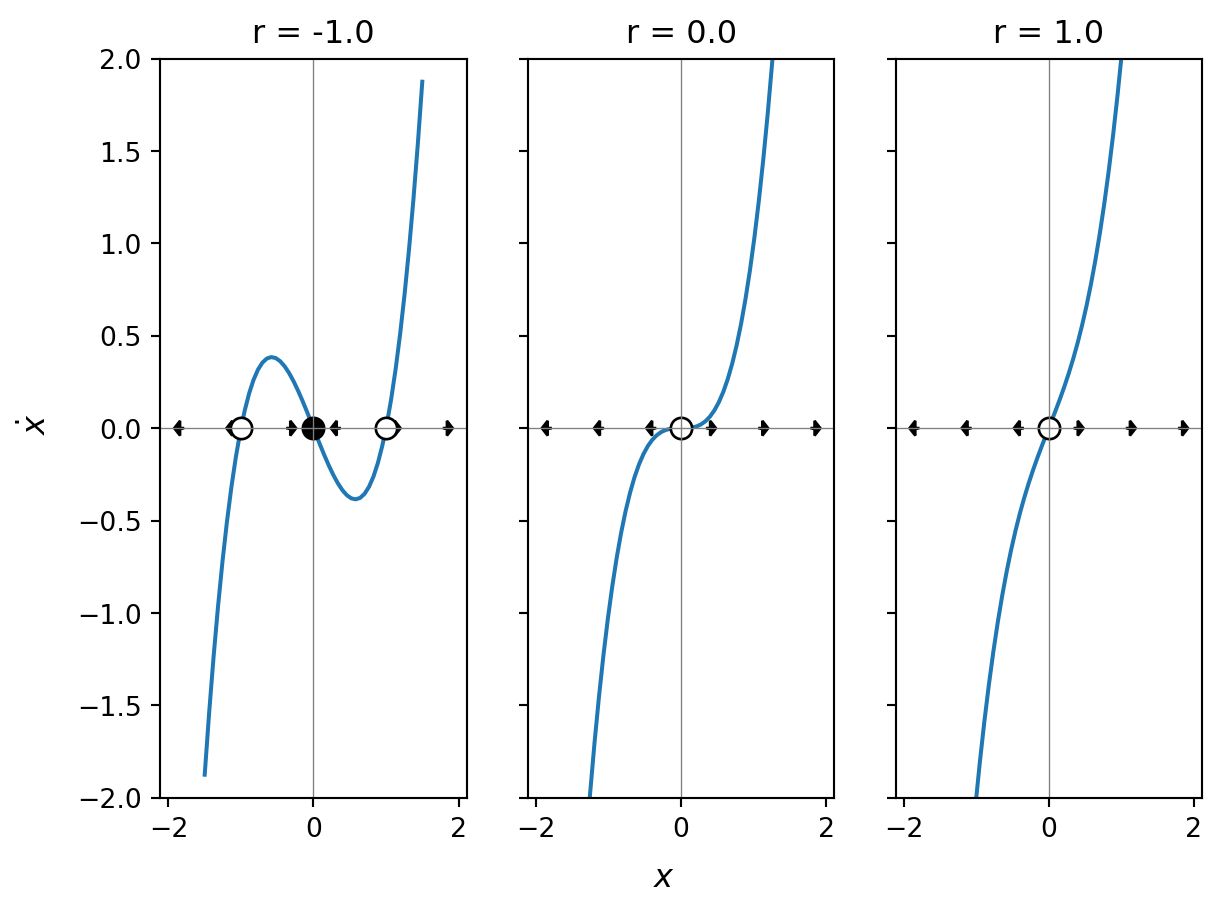

In [7]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-1.5,1.5)

r_vec=[-1.0,0.0,1.0]
fig,ax=plt.subplots(1,3,sharex=True, sharey=True)
ax=ax.flatten()

for i,r_i in enumerate(r_vec):
    f=r_i*x+x**3
    ax[i].plot(x,f)
    r=r_i
     # ---- fixed points ----
    fixed_points = [0.0]
    if r < 0:
        fixed_points += [np.sqrt(-r), -np.sqrt(-r)]
    
    for x_fp in fixed_points:
        df = r + 3 * x_fp**2   # derivative at fixed point
        
        if df < 0:   # stable
            ax[i].plot(x_fp, 0, 'ko', markersize=8)
        else:        # unstable
            ax[i].plot(x_fp, 0, 'ko', markerfacecolor='white', markersize=8)

    ax[i].axhline(0, color='gray', lw=0.5)
    ax[i].axvline(0, color='gray', lw=0.5)
    ax[i].set_title(f"r = {r}")
    ax[i].set_ylim([-2,2])

    x_arrows = np.linspace(-1.8, 1.8, 6)
    f_arrows = r * x_arrows + x_arrows**3

    for xa, fa in zip(x_arrows, f_arrows):
        if abs(fa) < 1e-3:
            continue
        direction = np.sign(fa)
        ax[i].arrow(
            xa, 0,
            0.12 * direction, 0,
            head_width=0.08,
            head_length=0.08,
            fc='k', ec='k',
            length_includes_head=True
        )
    fig.supxlabel('$x$')
    fig.supylabel('$\dot{x}$')

:::


::: {#fig-subcritf}

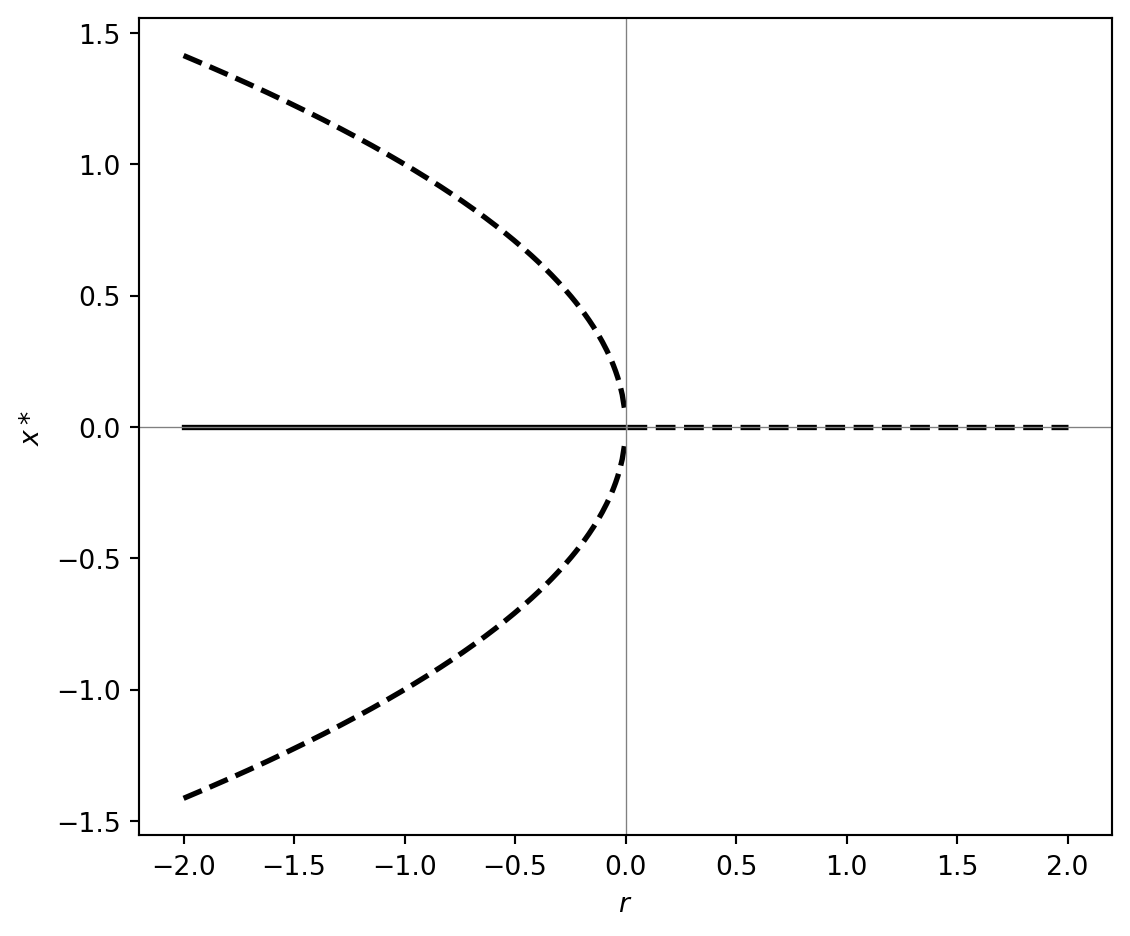

In [8]:
#| code-fold: true


import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(-2, 2, 400)

# fixed points
x0 = np.zeros_like(r)

x_plus = np.full_like(r, np.nan)
x_minus = np.full_like(r, np.nan)

mask = -r >= 0
x_plus[mask] = np.sqrt(-r[mask])
x_minus[mask] = -np.sqrt(-r[mask])

fig, ax = plt.subplots(figsize=(6, 5))

# unstable branch x = 0 for r > 0
ax.plot(r[r > 0], x0[r > 0], 'k--', lw=2)

# stable branch x = 0 for r < 0
ax.plot(r[r < 0], x0[r < 0], 'k-', lw=2)

# stable branches ±sqrt(r)
ax.plot(r, x_plus, 'k--', lw=2)
ax.plot(r, x_minus, 'k--', lw=2)

ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

ax.set_xlabel("$r$")
ax.set_ylabel("$x*$")


plt.tight_layout()
plt.show()


:::

<!--
## Application: the spruce budworm model
The spruce budworm is a destructive and widely distributed forest defoliator in North America. Massive outbreaks occur periodically and can destroy large quantities of valuable spruce and fir. To understand the outbreak behaviour and develop and management strategies, a series of mathematical models have been developed, beginning with @ludwig1978qualitative. The goal of the models is to explain the qualitative pattern of sudden outbreaks and then a sudden collapse.

### Model development
Letting $N(t)$ represent the population size at time $t$, it is assumed that budworm exhibits  logistic growth and is subject to  predation at rate $p(N)$.
 A governing ordinary differential equation is given by
$$
\frac{dN }{dt}= r_B N\left(1-\frac{N}{K_B}\right)-p(N),
$${#eq-sprucebudworm}
where 
$$
p(N) =\frac{B N^2}{A^2 +N^2},
$$
$r_B$ is the linear growth rate, $K_B$ is the carrying capacity, $B$ is the maximum rate of predation and $A$ is a measure of budworm population where predation switches on (specifically, $A$ represents the budworm density at which predation is half its maximum value).


It is informative to graph  the predation term
$$
p(N) =\frac{B N^2}{A^2 +N^2},
$$
and annotate the parameters $A$ and $B$.

There is a root at $N=0$.
In the limit $N\rightarrow \infty$, $p \rightarrow B$.
Note that $N=A$, $p=A/2$.
The derivative is
$$
p'(N)=\frac{2BN}{A^2+N^2} - \frac{2BN^3}{(A^2+N^2)^2} =  \frac{2BA^2N}{(A^2+N^2)^2}
$$
Thus there is a turning point at $N=0$ and $p'>0 \forall N>0$.


### Nondimensionalisation

Introducing the (as yet unspecified) dimensional scalings $\tilde{N}$ and $\tilde{T}$, the model is nondimensionalised as follows

$$
n=\frac{N}{\tilde{N}} \ \ \ \ \ \ \tau=\frac{t}{\tilde{T}}.
$$

Changing  variables in @eq-sprucebudworm yields

$$
\frac{\tilde{N}}{\tilde{T}}\frac{d n }{d\tau}= r_B \tilde{N}n\left(1-\frac{\tilde{N}n}{K_B}\right)-\frac{B\tilde{N}^2n^2}{A^2+\tilde{N}^2 n^2}.
$$

After some tidying

$$
\frac{dn }{d\tau}= r_B\tilde{T} n\left(1-\frac{\tilde{N}n}{K_B}\right)-\frac{B\tilde{N} \tilde{T}}{A^2}\frac{n^2}{1+\frac{\tilde{N}^2}{A^2}n^2}.
$$


A natural scale for cell density in the model is given by the parameter $A$, as it determines the density of budworm at which predation is half its maximal value. Hence we choose the scaling on the budworm density
$$
\tilde{N}=A.
$$ 
Similarly, a natural time scale for the model is given by  
$$
\tilde{T}=A/B.
$$


Substituting for $\tilde{N}$ and $\tilde{T}$ yields
$$
\frac{dn }{d\tau}= rn\left(1-\frac{n}{q}\right)-\frac{n^2}{1+n^2} = H(n),
$${#eq-budwormnondim}
where we define the nondimensional parameters
$$
r= \frac{r_B A}{B} \ \ \  \textrm{and} \ \ \  q=\frac{K_B}{A}.
$$

Note that @eq-budwormnondim has two nondimensional parameters and all variables are dimensionless.  See @fig-sprucebudworm-rhs for a plot of right-hand side of equation @eq-budwormnondim. What kind of behaviours do you expect to see from the model? 


:::

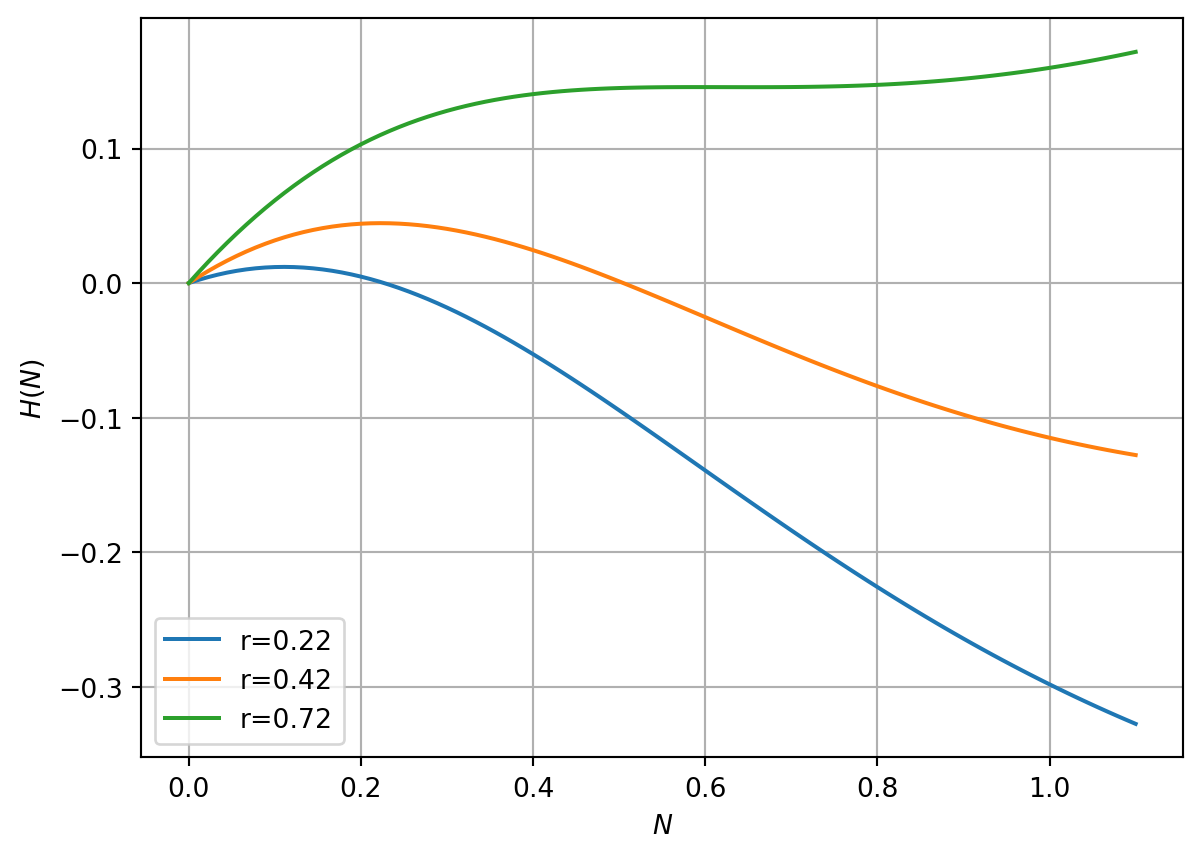

In [9]:
#| code-fold: true


#| label: fig-sprucebudworm-rhs
#| fig-cap: "RHS of spr. budworm model"
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

N_max=1.1
N_0=0.1
q=12
r_1=0.22
r_2=0.42
r_3=0.72

n_vec=np.linspace(0,N_max,100)

def rhssprucebudworm_model(x,t,r,q):

  rhs=r*x*(1-x/q) - x**2/(1+x**2)
  return rhs
def rhssprucebudworm_model_f(x,t,r,q):

  f=r*x*(1-x/q) 
  return f  
def rhssprucebudworm_model_g(x,t,r,q):

  g=x**2/(1+x**2)
  return g  

rhs1=rhssprucebudworm_model(n_vec,0,r_1,q)
rhs2=rhssprucebudworm_model(n_vec,0,r_2,q)
rhs3=rhssprucebudworm_model(n_vec,0,r_3,q)

fig, ax = plt.subplots(1)

ax.plot(n_vec, rhs1,n_vec, rhs2,n_vec, rhs3)
plt.xlabel('$N$')
plt.ylabel('$H(N)$')
plt.legend(['r='+str(r_1),'r='+str(r_2),'r='+str(r_3)])
plt.grid(True)
plt.show()

:::

### Numerical solutions
In @fig-sprucebudworm-numsol we plot some numerical solutions of @eq-budwormnondim at different values of the parameter $r$. 

Numerical solutions of @eq-budwormnondim  indicate that there is a single stable steady state when $r$ is both small and large but for intermediate values of $r$ there are two stable steady states. 

Our goal is to analyse the model and understand why different parameter values yield these strikingly different model behaviours.




:::

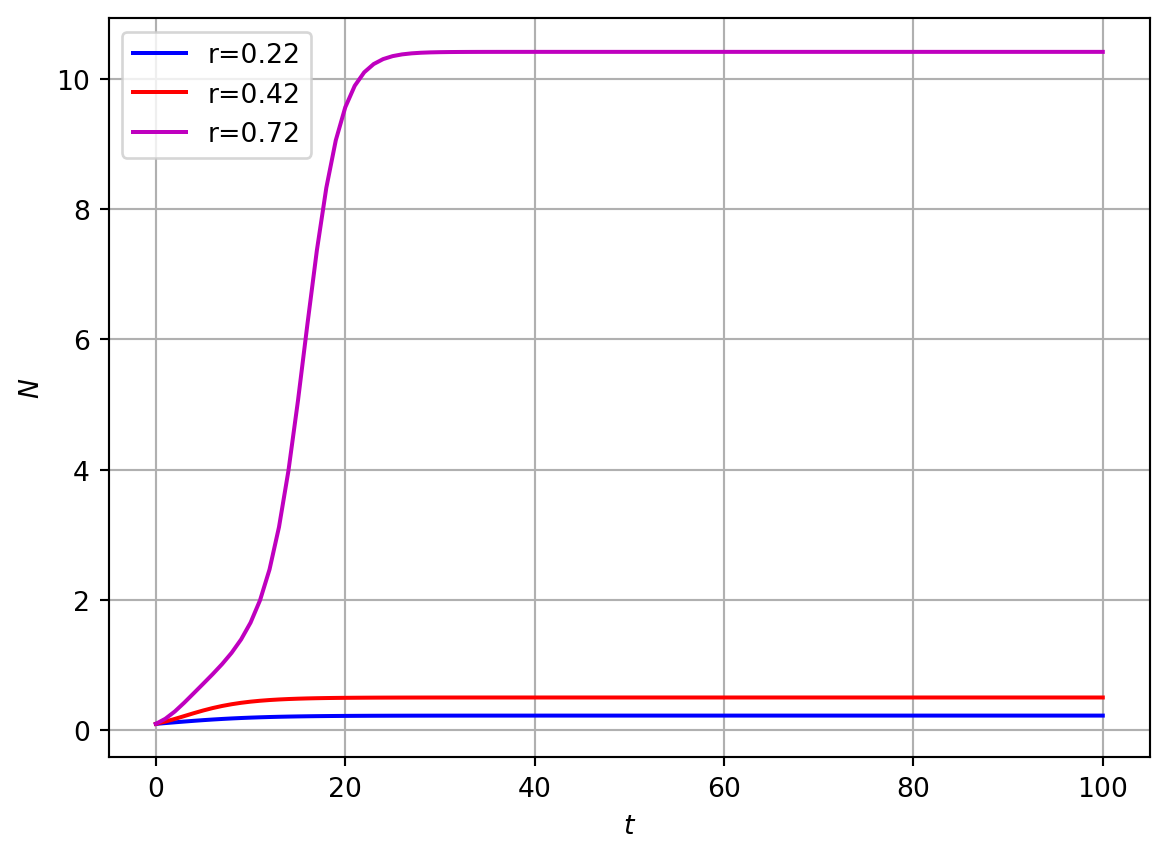

In [10]:
#| code-fold: true

#| label: fig-sprucebudworm-numsol
#| fig-cap: "Numerical solution of spr. budworm model"

# Define time
t = np.linspace(0, 100, 101)

# Numerically solve the ODE for differnet parameter values
sol1 = odeint(rhssprucebudworm_model, N_0, t, args=(r_1, q))
sol2 = odeint(rhssprucebudworm_model, N_0, t, args=(r_2, q))
sol3 = odeint(rhssprucebudworm_model, N_0, t, args=(r_3, q))


# plot results
fig, ax= plt.subplots()
ax.plot(t, sol1, 'b', label='r=' +str(r_1))
ax.plot(t, sol2, 'r', label='r='+str(r_2))
ax.plot(t, sol3, 'm', label='r='+str(r_3))

plt.legend(loc='best')
plt.xlabel('$t$')
plt.ylabel('$N$')

plt.grid()
plt.show()

:::


### Steady state analysis
Letting $n^*$ represent steady states of @eq-budwormnondim yields
$$
rn^*(1-\frac{n^*}{q})- \frac{n^*{^2}}{1+n^*{^2}}=0.
$$
Hence either 
$$
n^*=0,
$$ 
or $n^*$ satisfies the cubic equation
$$
r\left(1-\frac{n^*}{q}\right)- \frac{n^*}{1+n^*{^2}}=0.
$$

Explicit solutions to such a cubic can be immediately written down but they are cumbersome to work with.  We proceed using a graphical/qualitative approach.

Define
$$
f(n^*)=r\left(1-\frac{n^*}{q}\right) \ \ \textrm{and} \ \ g(n^*)=\frac{n^*}{1+n^*{^2}}.
$${#eq-sprucebudwormfgn}

Roots occur for values of $n^*$ that satisfy $f=g$. 

In @fig-sprucebudworm-rhsfg (a) we fix the parameter $q=10$ and consider model behaviour as a function of the parameter $r$. 
When $r\gg1$ there is a nonzero steady-state corresponding to $n^*\gg 1$. 
When   $r\ll1$ there is a nonzero steady-state corresponding to $n^*\ll 1$. 
In the intermediate case there can be three intersection points.

We can use the curve sketching techniques form Tutorial Sheet 1 to sketch $f$ and $g$.

$f$ is linear.
There is  a root at $n^*=q$.
The derivative is $-r/q$.
$f(0)$=r.
$g$ has a unique root at $n^*=0$.
The derivative is
$$
g'=\frac{1-n{^*}^2}{(1+n^*)^2}.
$$
There is a turning point at $n^*=1$. Here $g=1/2$.
As $n^*\rightarrow \infty$, $g\rightarrow 0$.
$f'(0)=1$.

### Linear stability analysis

The linear stability of the model is determined by the quantity
$$
H'(n)=r(1-\frac{2n}{q})-\frac{2{n}}{1+{n}^2} +\frac{2{n}^3}{(1+{n}^2)^2}.
$$

Hence at the steady state $n^*=0$ 
$$
H'(0)=r
$$
and the steady state is linearly unstable.

Given the  nonzero steady states have not been calculated explicitly, we proceed using graphical analysis of stability. In @fig-sprucebudworm-rhsfg  (b) we plot the right-hand side of @eq-budwormnondim against $n$ and examine the cases of large, small and intermediate $r$ for a given value of $q$. 

When $r$ is both large and small the nonzero steady state is stable (the derivative at the roots is negative). 
In the case where three biologically relevant roots exist, the intermediate root is unstable.

:::

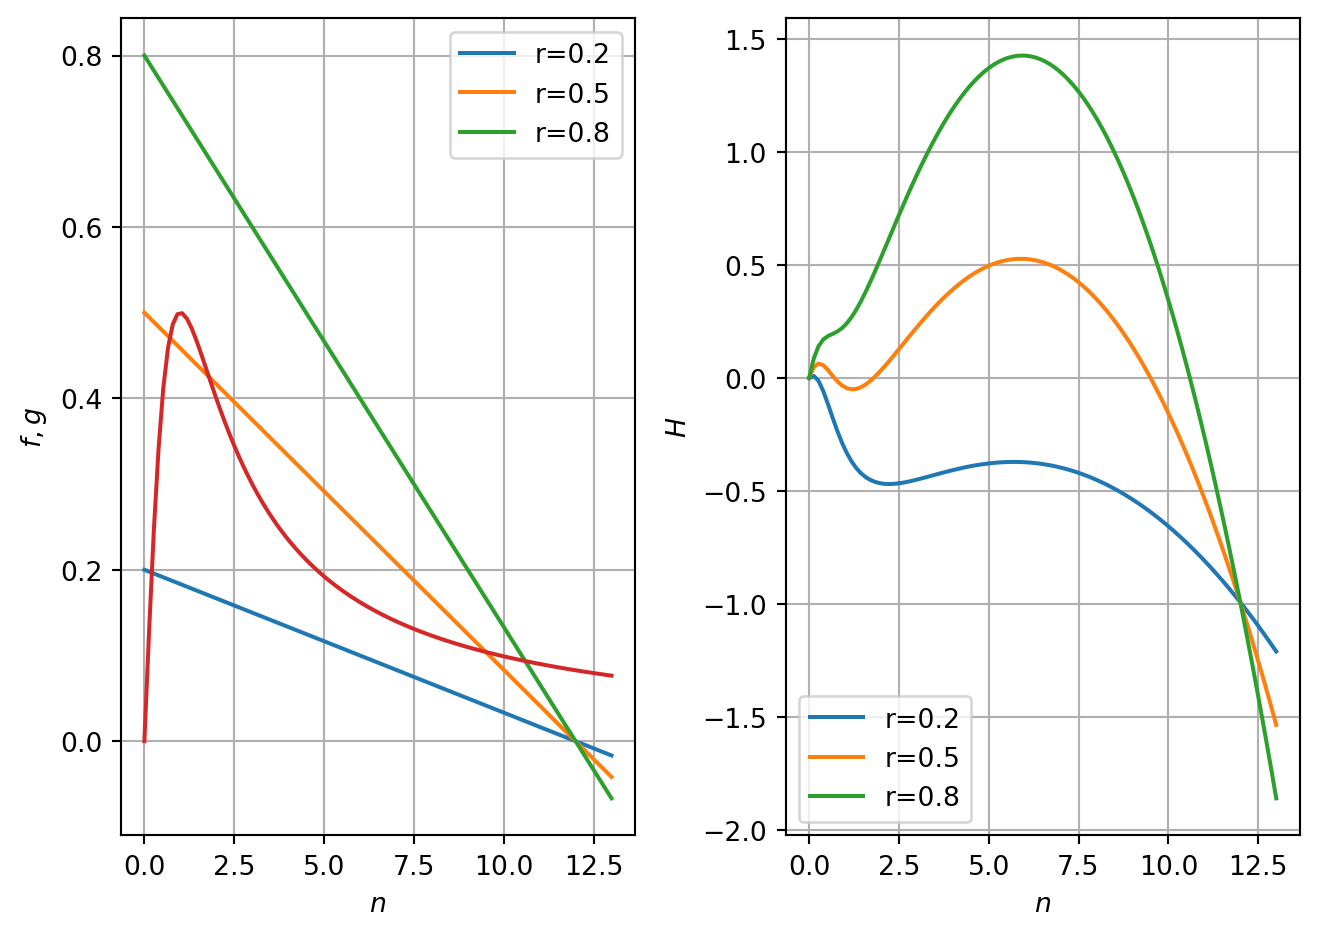

In [11]:
#| code-fold: true

#| label: fig-sprucebudworm-rhsfg
#| fig-cap: "RHS of spr. budworm model"
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Define initial condition
N_0=0.1

# Define model parameters
q=12
r_1=0.2
r_2=0.5
r_3=0.8

# Discretise n
N_max=13
n_vec=np.linspace(0,N_max,100)

# Function to compute f and g
def rhssprucebudworm_model_f(x,t,r,q):

  f=r*(1-x/q) 
  return f  
def rhssprucebudworm_model_g(x,t,r,q):

  g=x/(1+x**2)
  return g  

# Compute f for different values of r and g
f_1=rhssprucebudworm_model_f(n_vec,0,r_1,q)
f_2=rhssprucebudworm_model_f(n_vec,0,r_2,q)
f_3=rhssprucebudworm_model_f(n_vec,0,r_3,q)
g=rhssprucebudworm_model_g(n_vec,0,r_1,q)


# Compute H for different values of r
h_1=rhssprucebudworm_model(n_vec,0,r_1,q)
h_2=rhssprucebudworm_model(n_vec,0,r_2,q)
h_3=rhssprucebudworm_model(n_vec,0,r_3,q)


# Plot results
fig, ax = plt.subplots(1,2)

ax[0].plot(n_vec, f_1,n_vec, f_2,n_vec, f_3,n_vec,g)
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$f,g$')
ax[0].grid(True)
ax[0].legend(['r='+str(r_1),'r='+str(r_2),'r='+str(r_3)])
ax[1].plot(n_vec, h_1,n_vec, h_2,n_vec, h_3)
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('$H$')
ax[1].grid(True)
ax[1].legend(['r='+str(r_1),'r='+str(r_2),'r='+str(r_3)])
plt.tight_layout()
plt.show()

:::




### Bifurcation analysis
The goal is to identify boundaries of $rq$ parameter space where the stability changes occur and/or the number of steady states changes.

We can define points in $rq$ parameter space where bifurcations arise by seeking values of $n^*$ that satisfy
$$
f(n^*)= g(n^*) \ \ \ \  f'(n^*)= g'(n^*).
$$

The first of these equations yields
$$
  r(1-\frac{n^*}{q}) = \frac{n^*}{1+n{^*}^{2}},
$$ {#eq-rqeqn1}
and the latter yields
$$
 -\frac{r}{q}=\frac{1}{1+n{^*}^{2}}-\frac{2n{^*}^{2}}{(1+n{^*})^2} = \frac{1-n{^*}^{2}}{(1+n{^*}^{2})^2}.
$${#eq-rqeqn2}
  

Hence
$$
   \frac{r}{q}= \frac{n{^*}^{2}-1}{(1+n{^*}^{2})^2}.
$$

Substituting for $r/q$ in the first equation yields
$$
r-\frac{n{^*}^{2}-1}{(1+n{^*}^{2})^2}n^*=\frac{n^*}{1+n{^*}^{2}},
$$
which can be written in the form
$$
r=\frac{2n{^*}^{3}}{(1+n{^*}^{2})^2}.
$$
Substituting for $r$ in @eq-rqeqn1 yields
$$
\frac{2n{^*}^{3}}{(1+n{^*}^{2})^2}=\frac{2n{^*}^{3}}{(1+n{^*}^{2})^2}\frac{n^*}{q}+\frac{n^*}{1+n{^*}^2}
$$
which, after some algebra, yields
$$
q=\frac{2n{^*}^3}{n{^*}^{2}-1}.
$$ {#eq-sprucebudwormqpara}
Hence a set of points that define bifurcations where three steady states transform to a single steady state are given in parametric form in $qr$ parameter space by
$$
\left(\frac{2n{^*}^3}{n{^*}^{2}-1},\frac{2n{^*}^{3}}{(1+n{^*}^{2})^2}\right) \ \ \ \ \ \ \ n^*>1.
$$


:::

/var/folders/m_/vc0kz_0x6ls5n4qnksq052jw0000gp/T/ipykernel_20046/1365770302.py:3: RuntimeWarning:

divide by zero encountered in divide



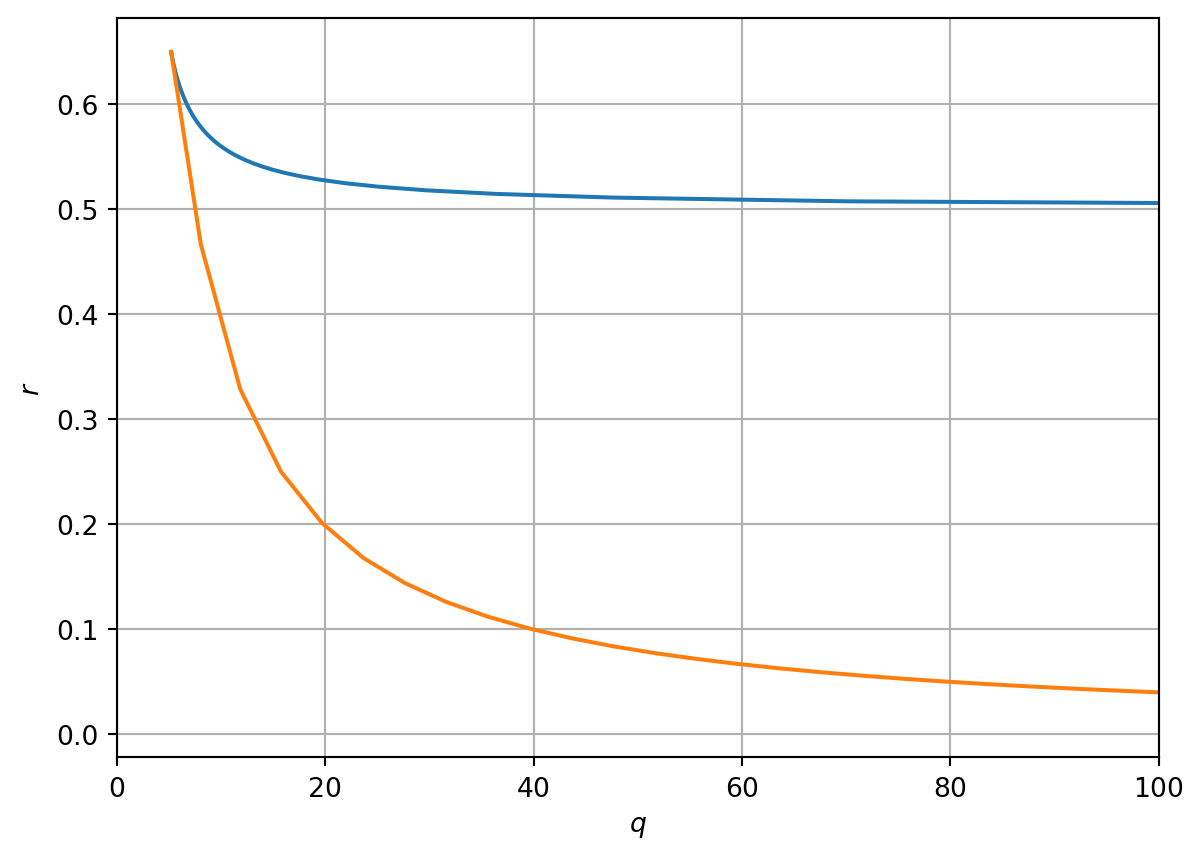

In [12]:
#| code-fold: true
#| label: fig-sprucebudworm-rq
#| fig-cap: Bifurcations in the rq plane

# Function to compute bifurcation values of r and q as a function of n_star
def Computerq(x):
  q_n_star=2*x**3/(x**2-1)
  r_n_star=2*x**3/(1+x**2)**2
  return  r_n_star,q_n_star

# Define different domains of n
n_s_1=np.linspace(1,np.sqrt(3),100)
n_s_2=np.linspace(np.sqrt(3),200,100)

# Compute r and q
r_1,q_1=Computerq(n_s_1)
r_2,q_2=Computerq(n_s_2)

# Plot results
fig, ax = plt.subplots(1)

ax.plot(q_1, r_1,q_2, r_2)
plt.xlabel('$q$')
plt.ylabel('$r$')
ax.set_xlim([0, 100])
plt.grid(True)

plt.show()

:::

By varying values of $n^*$ in @fig-sprucebudworm-rq we plot a region of instability. Note for example that $q\rightarrow \infty$ as $n^*\rightarrow 1$ and as  $n^*\rightarrow \infty$. Note also that in these limits $r$ must take the value 1/2 and 0, respectively.

We can show that the cusp in  @fig-sprucebudworm-rq
is given by
$$
\left(q,r\right)=\left(3^{\frac{3}{2}},\left(\frac{\sqrt{3}}{2}\right)^3\right).
$$

Note that $r$ is a decreasing function of $q$ for $1<n^*<\sqrt{3}$ but that $r$ is an increasing function of $n^*$ for $\sqrt{3}<n^*<\infty$. This can be shown by finding the turning points of $r$ w.r.t $n^*$, i.e.
Given that
$$
r=\frac{2n{^*}^{3}}{(1+n{^*}^{2})^2},
$$
differentiation with respect to $n^*$ yields
$$
\frac{dr}{dn^*}=\frac{6{n^*}^2}{(1+n^*)^2} - \frac{8n{^*}^4}{(1+n^*)^3}.
$$
The turning point satisfies
$$
\frac{6{n^*}^2}{(1+n^*)^2} - \frac{8n{^*}^4}{(1+n^*)^3}=0
$$
Solving for $n^*$ yields
$$
6(1+{n^*}^2) - 8n{^*}^2=0 
$$
Hence
$$
  n^*=\sqrt{3}.
$$
Thus there is a turning point that minimises $r$ at $n^*=\sqrt{3}$.

Substitution for this value of $n^*$ yields
$$
\left(q,r\right)=\left(3^{\frac{3}{2}},\left(\frac{\sqrt{3}}{2}\right)^3\right).
$$
See @fig-sprucebudworm-rq.



### Hysteresis 

Finally, rearranging the steady-state equation 
$$
  r(1-\frac{n^*}{q}) = \frac{n^*}{1+n{^*}^{2}},
 $$
 we obtain
$$ 
   r = \frac{n^*}{(1+n{^*}^{2})(1-\frac{n^*}{q})}.
$$ {#eq-sprucebudwormrpara}

Considering $n^*<q$ we  compute $r$; plotting $n^*$ against $r$ yields the bifurcation curve presented in @fig-sprucebudworm-bfc. 


:::

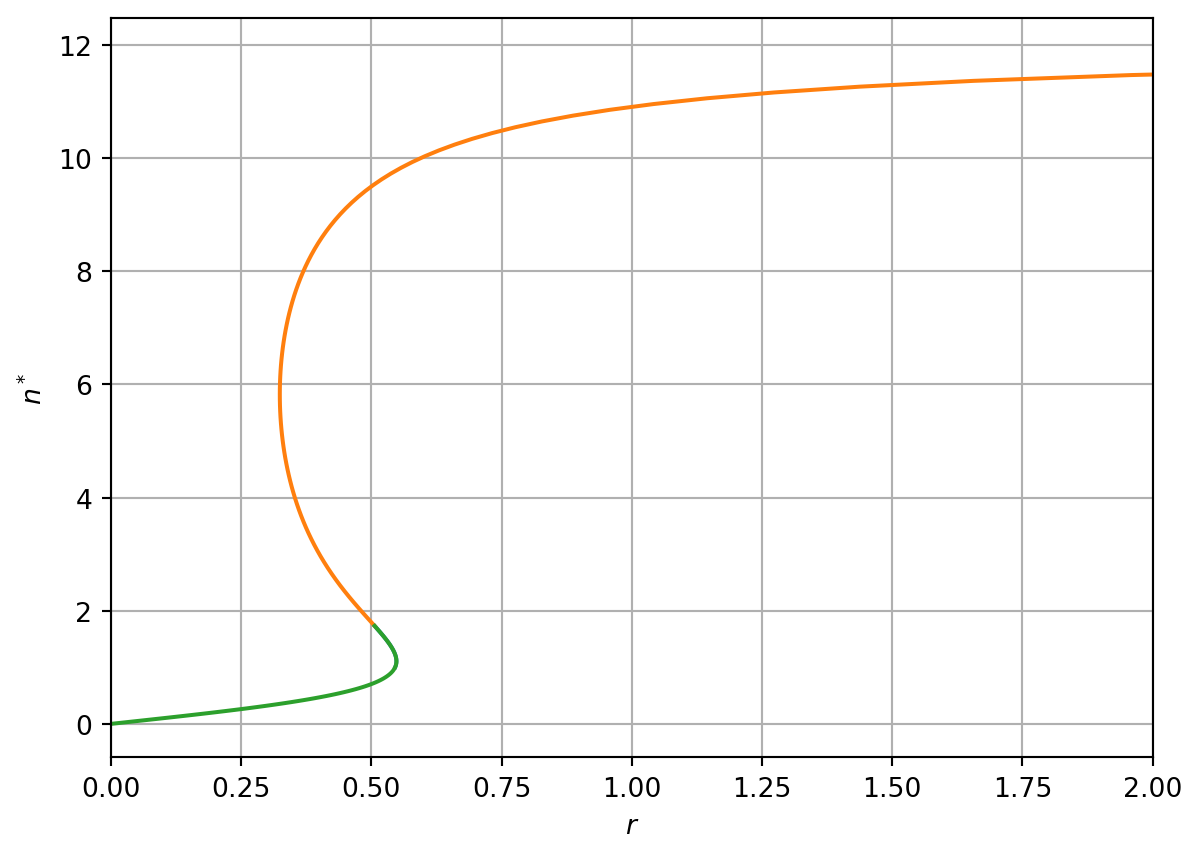

In [13]:
#| code-fold: true
#| label: fig-sprucebudworm-bfc
#| fig-cap: Bifurcations in the rq plane

# Compute r as a function of n
def Computern(x,q):
  r=x/((1+x**2)*(1-x/q))
  return  r

# Define different domains of n for plotting 
q=12
n_s_1=np.linspace(1,np.sqrt(3),100)
n_s_2=np.linspace(np.sqrt(3),0.99*q,100)
n_s_3=np.linspace(0,np.sqrt(3),100)


# Evaluate r
r_1=Computern(n_s_1,q)
r_2=Computern(n_s_2,q)
r_3=Computern(n_s_3,q)


# Plote results
fig, ax = plt.subplots(1)

ax.plot(r_1, n_s_1,r_2, n_s_2,r_3,n_s_3)
plt.xlabel('$r$')
plt.ylabel('$n^*$')
ax.set_xlim([0, 2])
plt.grid(True)

plt.show()

:::

A system exhibiting hysteresis shows a response to an increases in a control parameter that is not exactly reversed when the parameter is decreased. We can show that the spruce budworm model exhibits hysteresis by considering the argument below.

Suppose $r$ is initially small ($r<r_1$). There is only one steady-state and any initial condition will converge towards it. 

 Suppose we increase the value of the parameter $r$. There will be a critical value of $r$ ($r=r_1$)where a second stable steady-state arises and the model enters the bistable regime, where there are two possible stable steady-states. Given the system system was originally in the first stable steady state, it will remain there. 

 Suppose we continue to increase $r$. Eventually we reach  critical value of $r$ ($r=r_2$) where the first stable steady state is lost and there is again only one stable steady-state. 

 Suppose we now decrease the parameter $r$ below the threshold $r=r_2$. The system again enters the bistable regime but as the second solution is stable, it remains the solution. 

 Suppose we continue to decrease $r$ until eventually $r<r_1$. We return to the case where the system has only a single stable steady state. 
 



## References

-->